In [1]:
import pandas as pd
import pickle

import sys
sys.path.append("../")
import src.soporte as sp

In [8]:
# Importamos nuestros datos
df = pd.read_csv("../data/train.csv")
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


In [3]:
# Eliminamos la columna que no vamos a usar
df.drop(["id"], axis = 1, inplace = True)

In [4]:
# Exploramos nuestros datos con una función
sp.analisis_basico(df)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Estructura de los datos: (40455, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Número de filas duplicadas:
85
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Columnas, Nulos y Dtypes:


,nulos,dtypes
carat,0,float64
cut,0,object
color,0,object
clarity,0,object
depth,0,float64
table,0,float64
x,0,float64
y,0,float64
z,0,float64
price,0,float64


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Descripción de las variables tipo Numéricas:


,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Descripción de las variables tipo Categóricas:


,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+



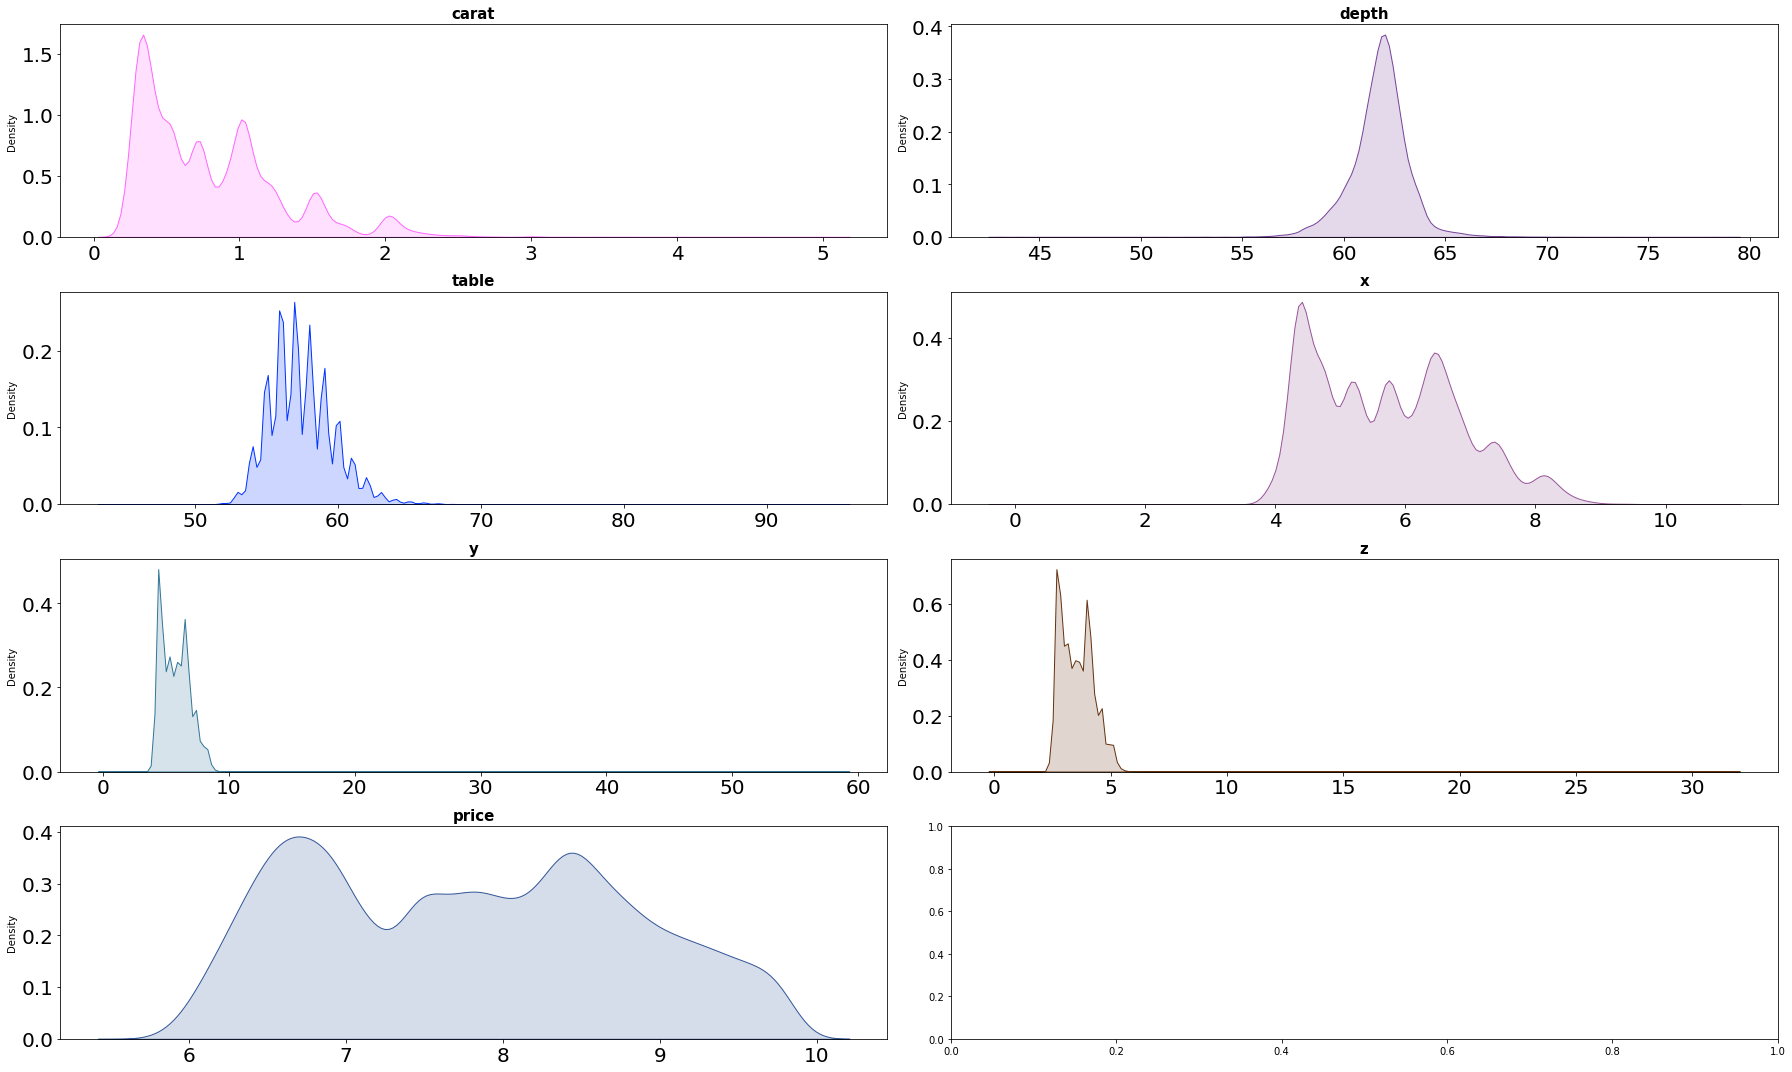

In [5]:
# Analizamos la distribución de nuestras variables numéricas de nuestros datos con una función
sp.distribucion_numericas(df)

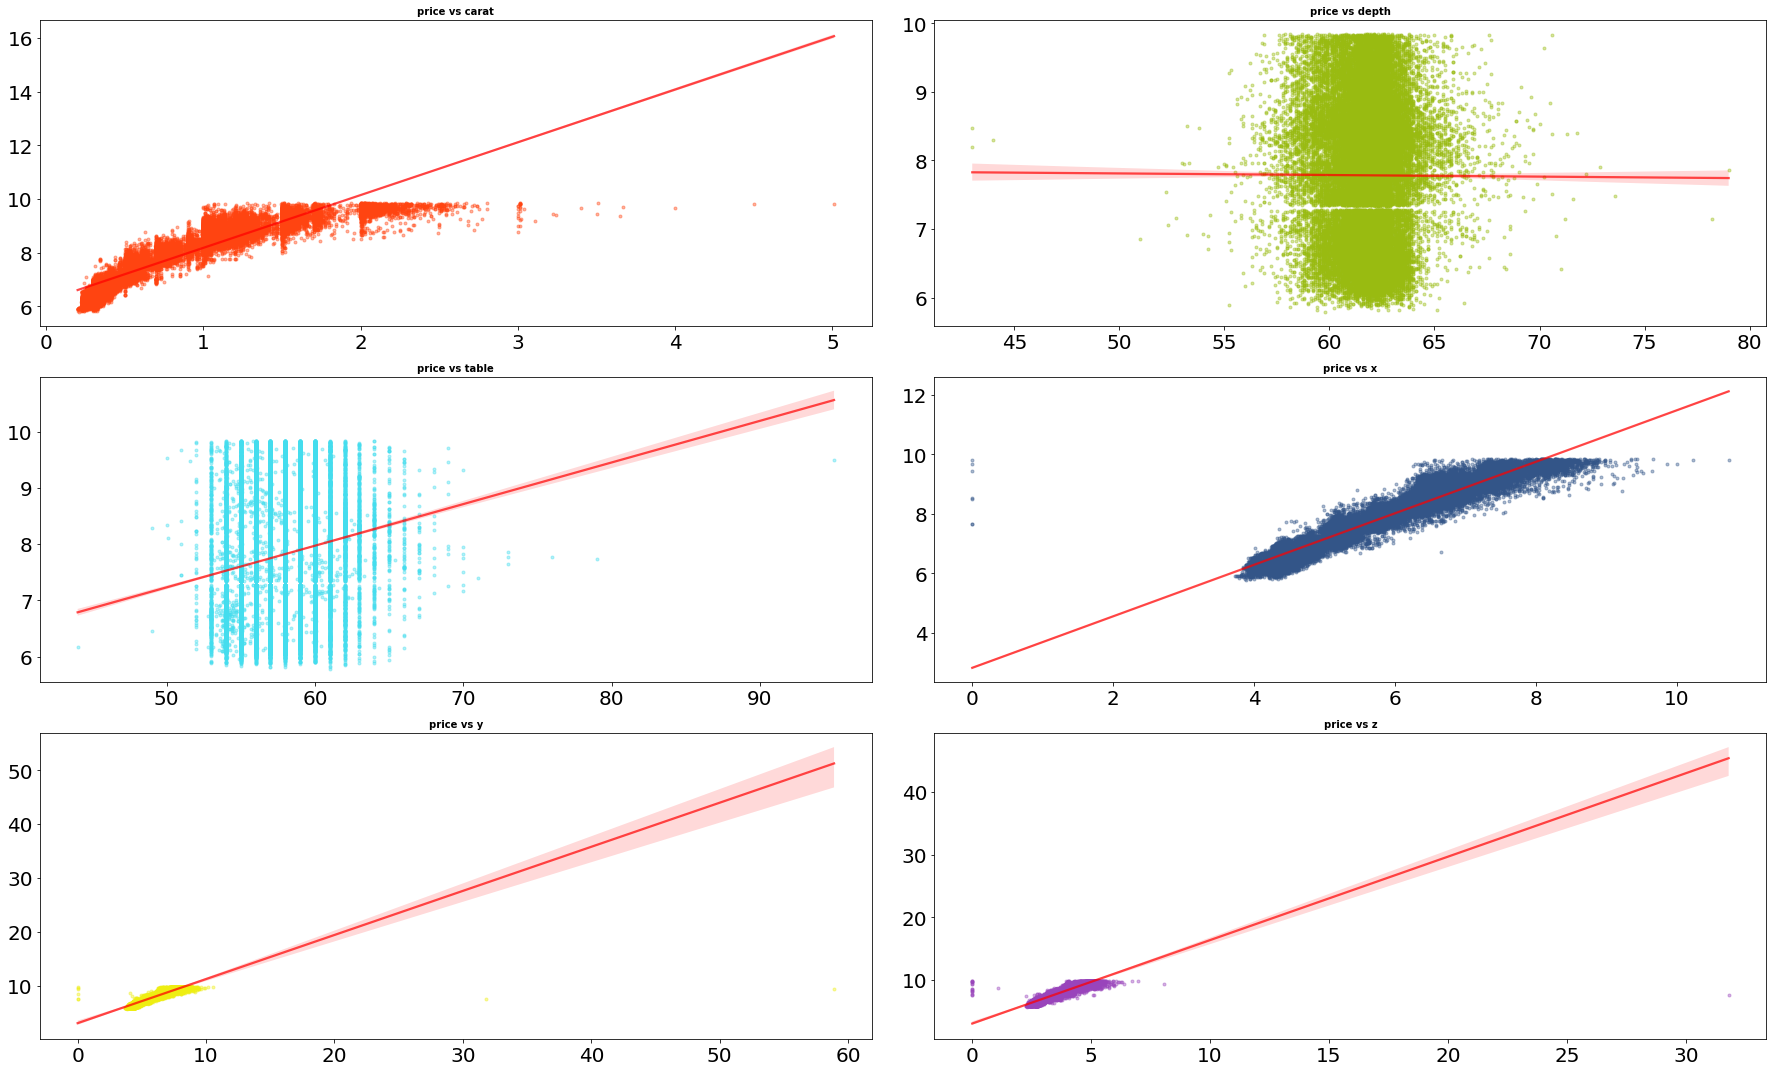

In [6]:
# Estudiamos la correlación de las variables numéricas con nuestra variable respuesta
sp.correla_respuesta_num(df,"price")

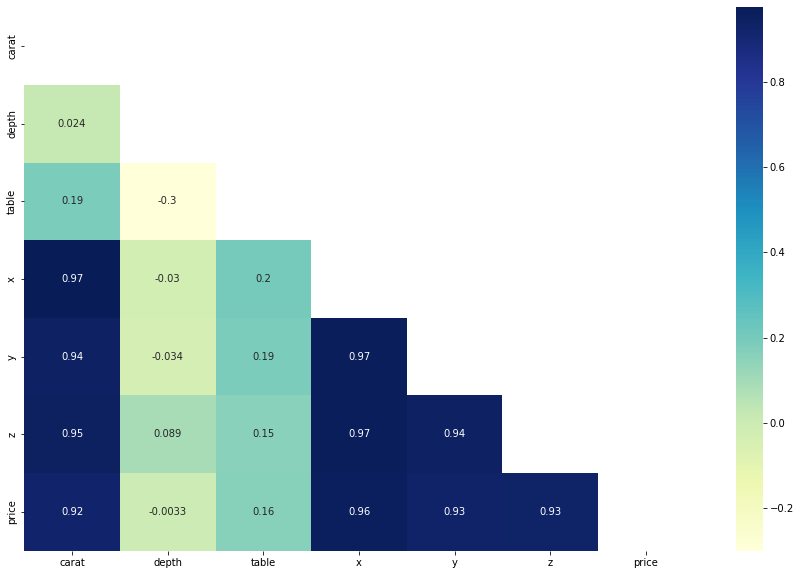

In [7]:
# Para tenerlo más claro, estudiamos la correlación con un heatmap
sp.correla_map(df)

In [8]:
# Eliminamos las variables poco relevantes, en mi caso, aunque carat, englobe "x", "y", "z", voy a probar con este enfoque
df.drop(["depth", "table"], axis = 1, inplace = True)

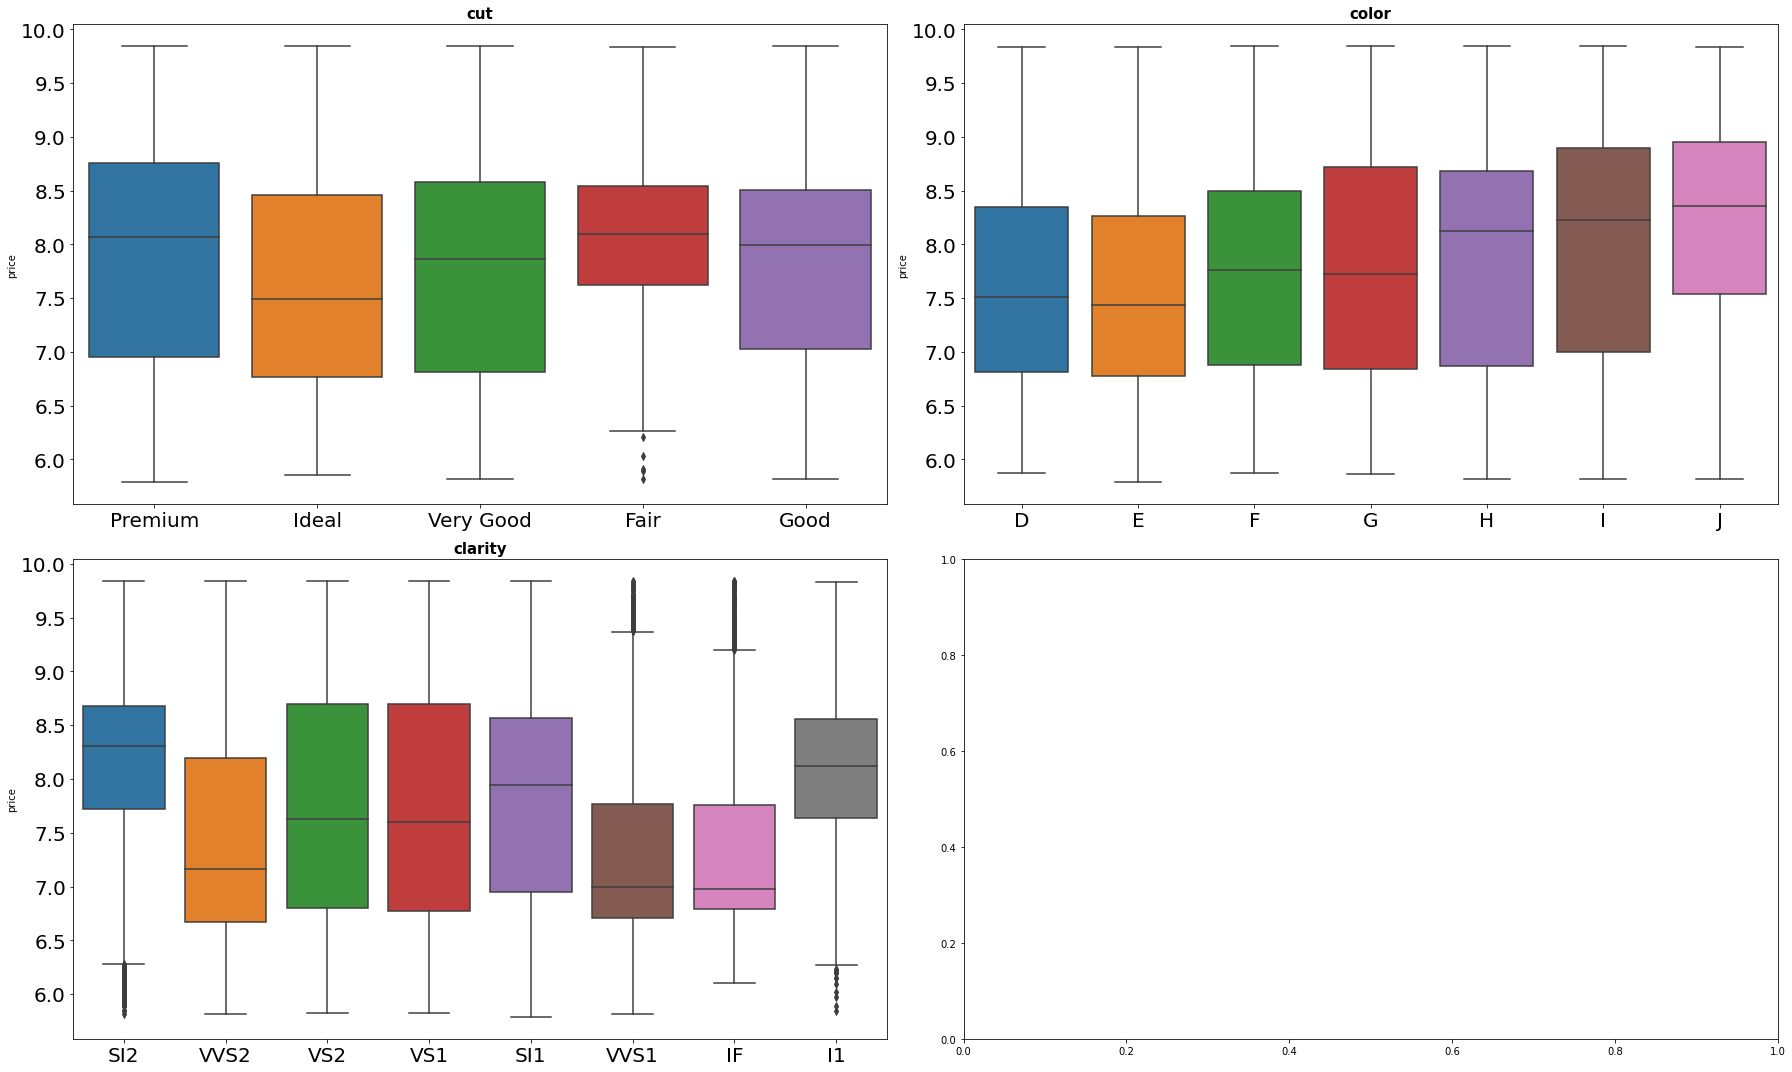

In [9]:
# Vemos la correlacion con laa variables categóricas
sp.correla_respuesta_cate(df, "price")

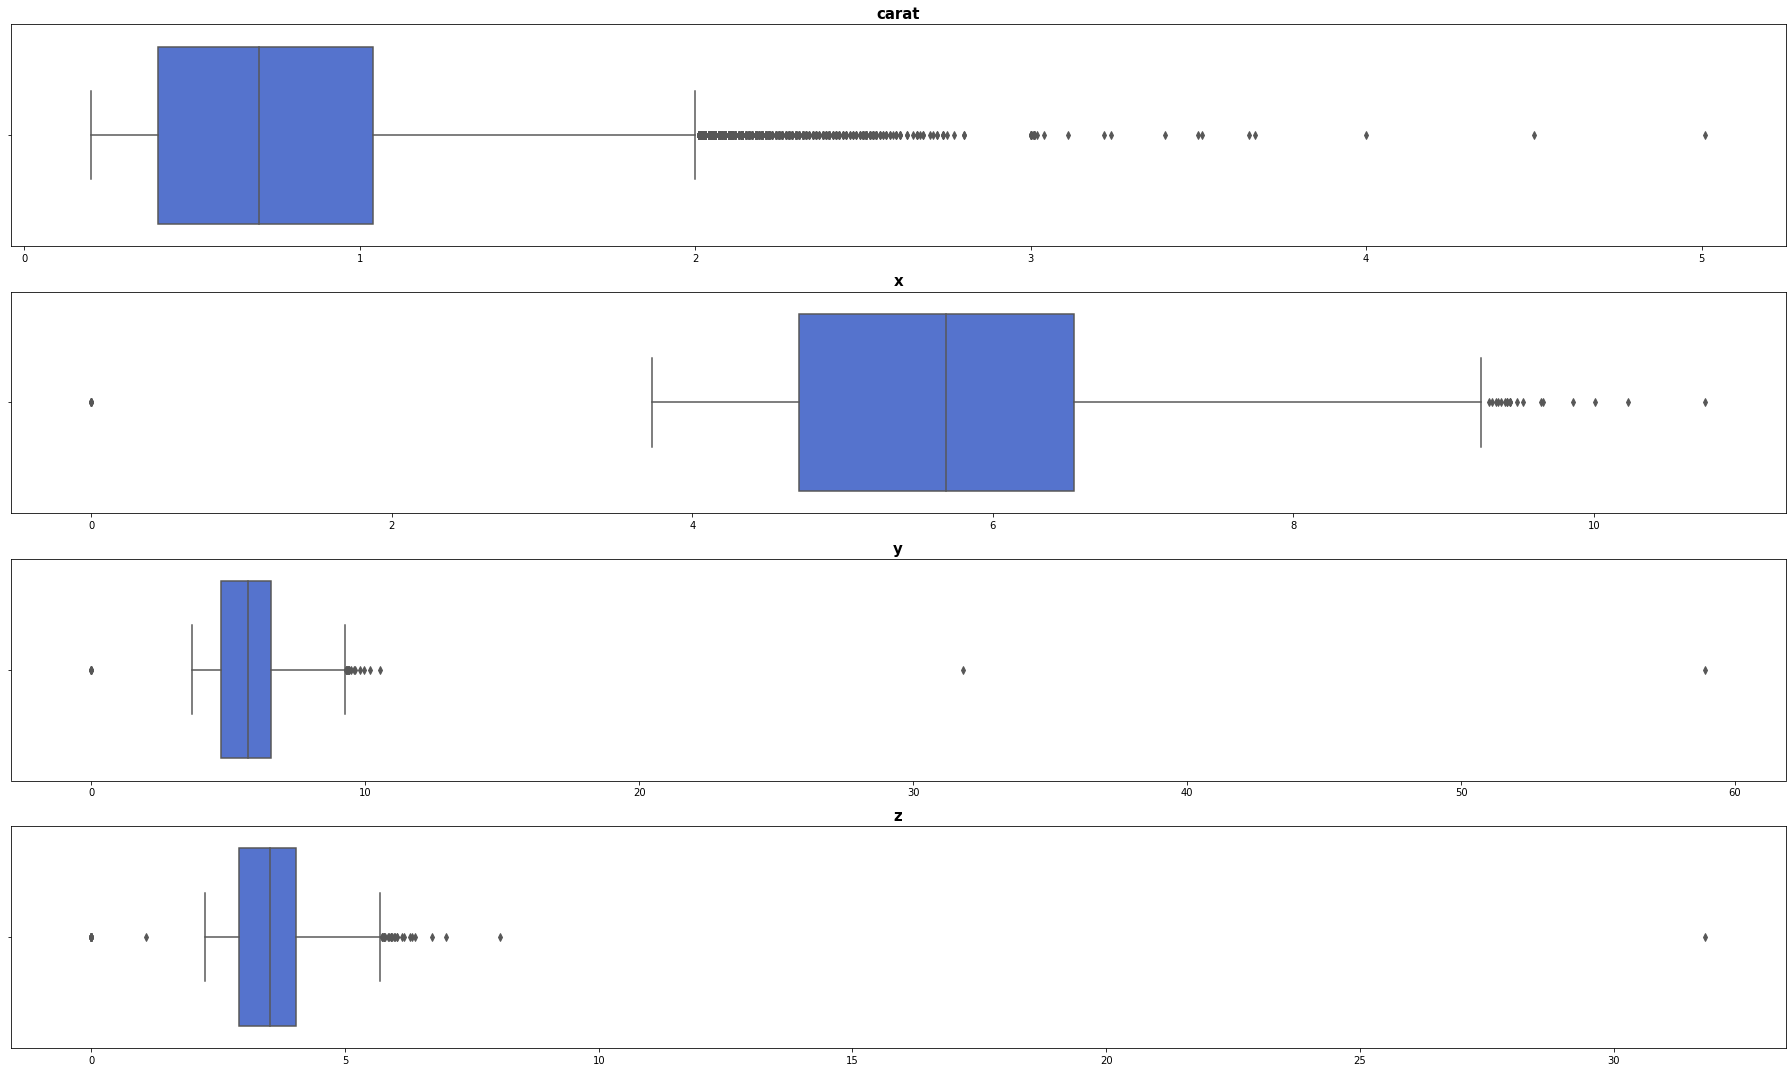

In [10]:
# Estudiamos los outliers
sp.outlier_boxplot(df, "price")

In [11]:
# Con una función, eliminamos los outliers de manera personalizada
especial = {"carat" : {"top" : 2.9},
            "x" : {"top" : 15},
            "y" : {"top" : 20},
            "z" : {"top" : 10}}
out = sp.detectar_outliers(df, "price", especial)


100%|██████████| 4/4 [00:00<00:00, 571.35it/s]


In [12]:
# Sustituimos los outliers por nulos para después procesarlos
df_sin_out = sp.tratar_outliers(df, out, "null")

100%|██████████| 4/4 [00:00<00:00, 1327.94it/s]


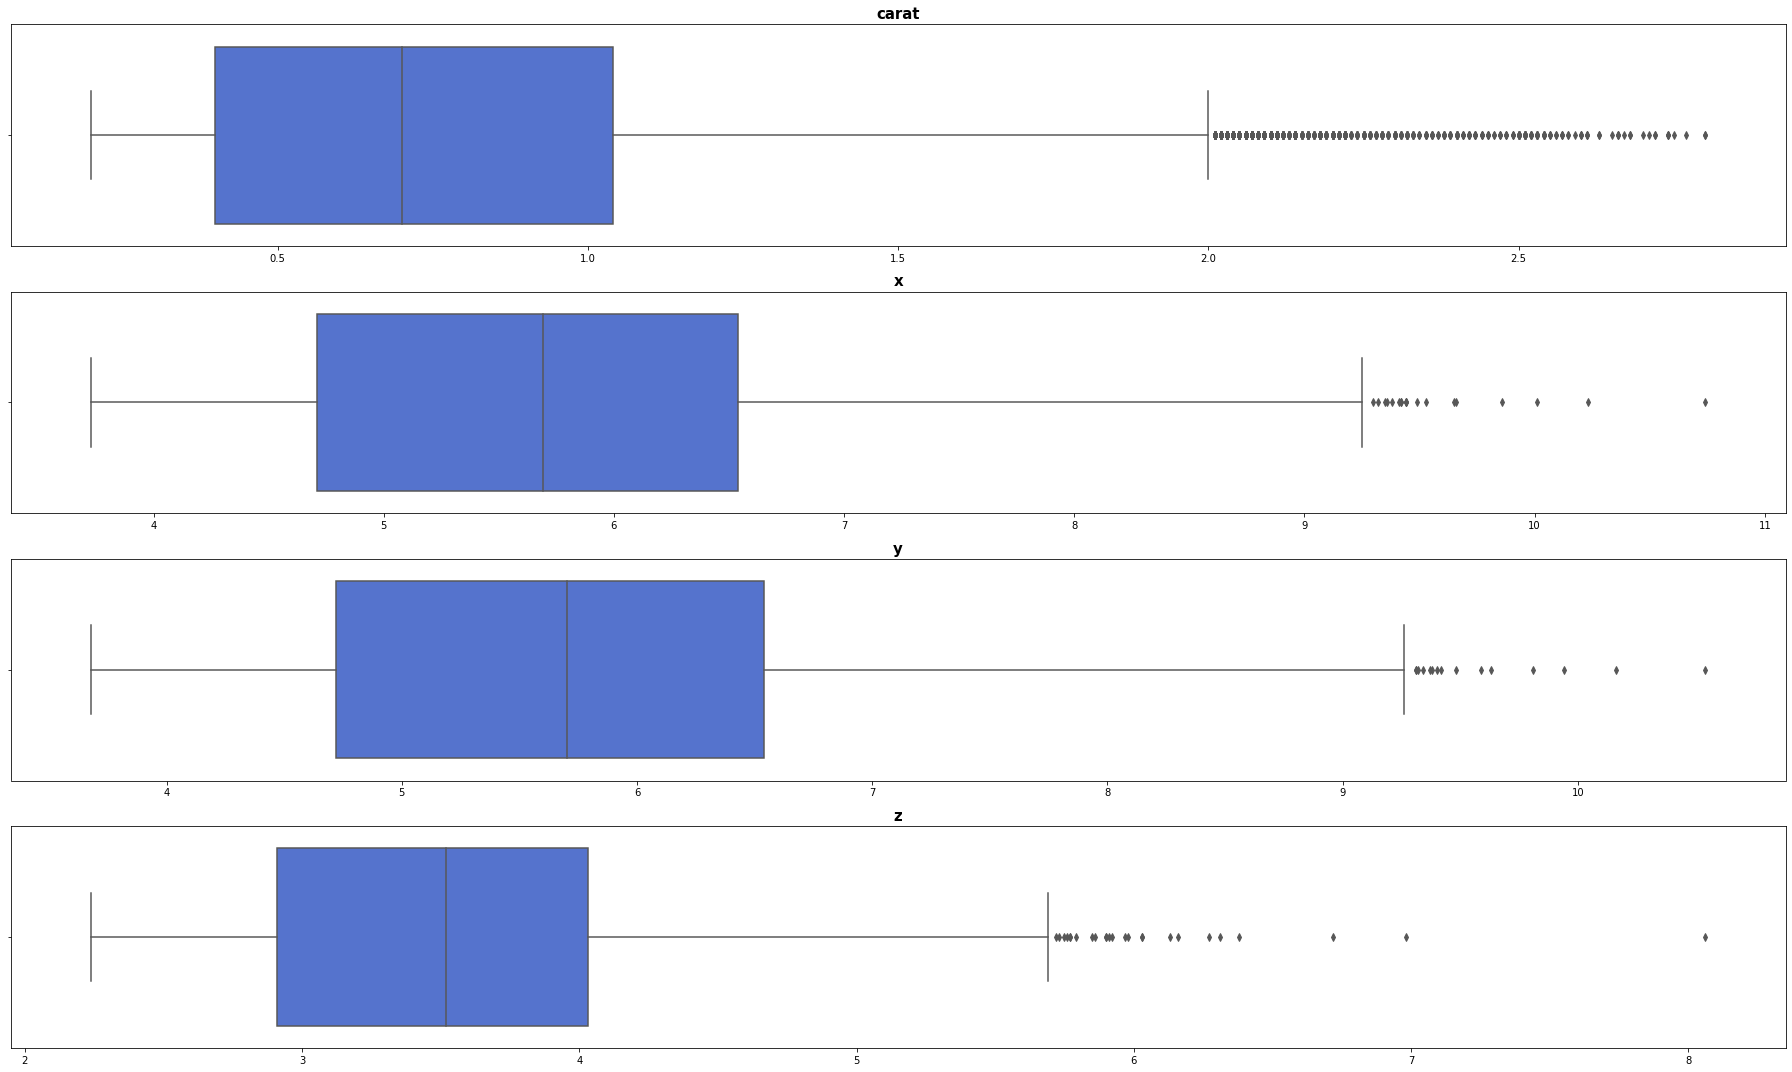

In [13]:
sp.outlier_boxplot(df_sin_out, "price")

In [14]:
# Tratamos los nulos con el método IterativeImputer
df2 = sp.tratamiento_nulos_num(df_sin_out, metodo = "iterative", respuesta = "price")

In [15]:
# Realizamos encoding de las variables categóricas de manera ordinal y con dos maps
encoding = {"cut": {"ordinal": ["Ideal", "Very Good", "Good", "Fair", "Premium"]},
        "color": {"map": {"D": 1, "E": 1, "F": 2, "G": 2, "H": 3, "I": 3, "J": 4}},
        "clarity": {"map" : {"VVS1": 1 , "IF": 1, "VVS2": 2, "VS2": 3, "VS1": 3, "SI1": 4, "SI2": 5, "I1":5 }}}
df_enconded = sp.encoder(df2, encoding)

100%|██████████| 3/3 [00:00<00:00, 176.48it/s]


In [16]:
df_enconded.head()

,cut,color,clarity,price,carat,x,y,z
0,4,1,5,6.353,0.30,4.31,4.28,2.68
1,0,1,2,9.183,1.01,6.42,6.46,4.04
2,0,2,3,7.983,0.72,5.71,5.74,3.54
3,1,2,5,8.371,1.08,6.54,6.50,4.12
4,4,2,3,6.588,0.36,4.50,4.55,2.82


In [17]:
# Buscamos los parámetros base posibles para nuestros árboles
parametros = sp.mejores_parametros_num(df_enconded, "price")

In [ ]:
# Entrenamos un árbol con estos parámetros
sp.modelos_num(df_enconded, "price", lista = ["tree"], parametros_tree = parametros, scoring = "neg_mean_squared_error", modelo = "Test", comparativa = False )

In [18]:
# Cargamos los parámetros de este mejor árbol
with open('../data/parametros_Decision_Tree_vTest.pkl', 'rb') as dtt:
    dt_test = pickle.load(dtt)

In [19]:
dt_test

{'max_depth': 36,
 'max_features': 3,
 'min_samples_leaf': 25,
 'min_samples_split': 50}

In [20]:
# Cambiamos un poco los parámetros para que tengan un rango un poco mayor, pero no tan grande como el inicial
new_parametros = {"max_depth" : [2, 3]+ [x for x in range(4,dt_test["max_depth"] + 1, 4)],
                  "max_features": [1, 2, 3],
                  "min_samples_leaf": [25, 50, 75],
                  "min_samples_split": [25, 50, 75]}

In [ ]:
# Entrenamos cuatro modelos distintos para comparar sus métricas
metricas = sp.modelos_num(df_enconded, "price", lista = ["tree", "forest", "knn", "gradient"], parametros_tree = new_parametros, scoring = "neg_mean_squared_error" )

In [3]:
# En este caso, cargo las métricas para no regenerar los modelos(mucho tiempo)
with open('../data/metricas_0.pkl', 'rb') as metri:
    metricas = pickle.load(metri)
# Comparamos las métricas, en este caso, los modelos son interesantes.    
metricas

,MAE,MSE,RMSE,R2,set,modelo
0,0.103325,0.019184,0.138507,0.981215,test,Decision_Tree 0
1,0.097631,0.017275,0.131435,0.983342,train,Decision_Tree 0
0,0.091510,0.015096,0.122864,0.985219,test,Random_Forest 0
1,0.088179,0.014068,0.118611,0.986434,train,Random_Forest 0
0,0.088616,0.014493,0.120388,0.985808,test,KNN 0
1,0.076333,0.010950,0.104640,0.989442,train,KNN 0
0,0.079935,0.012032,0.109689,0.988219,test,Gradient Booster 0
1,0.065565,0.007879,0.088764,0.992402,train,Gradient Booster 0


In [ ]:
# Entrenamos de nuevo esos modelos pero esta vez con todos los datos
metricas = sp.modelos_num(df_enconded, "price", lista = ["knn", "gradient"], parametros_tree = new_parametros, scoring = "neg_mean_squared_error", comparativa = False)